
<a><img src="https://cdn.pixabay.com/photo/2017/01/20/20/24/car-accident-1995852_1280.png" width="400" align="center"></a>

<h1 align="center"><font size="9">Applied Data Science Capstone</font></h1>
<hr style="border:3px solid blue"> </hr>

# Capstone Project - Car Accident Severity
### Applied Data Science Capstone by IBM/Coursera

<hr style="border:1px solid black"> </hr>

# Table of contents
1. [Introduction: Business Problem](#introduction)
2. [Data Understanding](#data_un)
    1. [Import Packages](#imp_pack_data_un)
    2. [Get Data](#get_data)
    3. [Data Exploration](#data_ex)
    4. [Parameter Selection](#parameter)
    5. [Visualization](#visual)
3. [Data Preparation](#data_pr)
    1. [Import Packages](#imp_pack_data_pre)
    2. [Data Separation](#data_se)
    3. [Data Cleaning](#data_cl)
    4. [Categorize Data](#cat_data)
    5. [Balance Data](#bal_data)
    6. [Train / Test Division](#tt_div)
4. [Modeling and Evaluation](#modeling)
    1. [Import Packages](#imp_pack_mod)
    2. [K nearest neighbor (KNN)](#knn)
    3. [Decision Tree](#dec_tree)
    4. [Logistic Regression](#log_reg)
    5. [Support Vector Machine (SVM)](#svm)
    6. [Evaluation](#eval)
5. [Conclusion](#conc)

# 1. Introduction: Business understanding (Problem) <a name="introduction"></a>
<hr style="border:1px solid black"> </hr>

In an effort to reduce the frequency and the sverity of car collisions in a community, an algorithim must be developed to predict the severity of an accident given the current weather, road and visibility conditions. 

When conditions are prone to fatal accidents, the model developed will allow drivers to be alerted to the likelihood of an accident and to be reminded to drive carefully.

# 2. Data Understanding<a name="data_un"></a>
<hr style="border:1px solid black"> </hr>
import data from csv fila using pandas library

the data set we are going to use contains data about car accidents provided by SPD and recorded by Traffic Records.([Download Data](https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv) [Download Metadata](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf)), The label for the data set is 'SEVERITYCODE' (Target variable), which describes the fatality of an accident, it can take 4 values:

* 0: Little to no Probability
* 1: Very Low Probability - Chance or Property Damage
* 2: Low Probability - Chance of Injury
* 3: Mild Probability - Chance of Serious Injury
* 4: High Probability - Chance of Fatality

## 2.1 Import Packages <a name="imp_pack_data_un"></a>
import data from csv fila using pandas library

In [1]:
#import packages
try:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("All packages installed")
except:
    print("error")

All packages installed


## 2.2 Get data <a name="get_data"></a>
import data from csv fila using pandas library

In [2]:
car_acc_df = pd.read_csv('Collisions.csv',encoding = "utf-8",low_memory=False)
car_acc_df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.288688,47.532714,1,29800,29800,1177964,Unmatched,Block,NaN,BEACON ER AVE S BETWEEN S PORTLAND ST AND S CH...,...,NaN,NaN,NaN,4315006.0,NaN,NaN,NaN,0,0,N
1,NaN,NaN,2,115700,115700,10097005,Unmatched,NaN,NaN,NaN,...,NaN,NaN,NaN,10097005.0,NaN,NaN,NaN,0,0,N
2,-122.355556,47.727318,3,1358,1358,3568600,Matched,Block,NaN,GREENWOOD AVE N BETWEEN N 134TH ST AND N 136TH ST,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
3,-122.317563,47.618764,4,70700,70700,2806057,Matched,Block,NaN,E DENNY WAY BETWEEN 11TH AVE AND 12TH AVE,...,Dry,Other,NaN,7065007.0,NaN,32,One parked--one moving,0,0,N
4,-122.361015,47.538551,5,53600,53600,2127310,Matched,Block,NaN,DELRIDGE WAY SW BETWEEN SW MYRTLE ST AND SW OR...,...,Dry,Daylight,NaN,6137017.0,NaN,14,From same direction - both going straight - on...,0,0,N


## 2.3 Data exploration<a name="data_ex"></a>
Appli some pandas methods to understand better the data

#### Dataset shape

In [3]:
print("Rows: ",car_acc_df.shape[0])
print("Columns: ",car_acc_df.shape[1])

Rows:  221144
Columns:  40


#### Data basic information

In [4]:
car_acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221144 entries, 0 to 221143
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                213675 non-null  float64
 1   Y                213675 non-null  float64
 2   OBJECTID         221144 non-null  int64  
 3   INCKEY           221144 non-null  int64  
 4   COLDETKEY        221144 non-null  int64  
 5   REPORTNO         221144 non-null  object 
 6   STATUS           221144 non-null  object 
 7   ADDRTYPE         217432 non-null  object 
 8   INTKEY           71774 non-null   float64
 9   LOCATION         216558 non-null  object 
 10  EXCEPTRSNCODE    100741 non-null  object 
 11  EXCEPTRSNDESC    11771 non-null   object 
 12  SEVERITYCODE     221143 non-null  object 
 13  SEVERITYDESC     221144 non-null  object 
 14  COLLISIONTYPE    194740 non-null  object 
 15  PERSONCOUNT      221144 non-null  int64  
 16  PEDCOUNT         221144 non-null  int6

#### Data statistic description

In [5]:
car_acc_df.describe(include="all")

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,213675.000000,213675.000000,221144.000000,221144.000000,221144.000000,221144,221144,217432,71774.000000,216558,...,194631,194463,5188,1.272050e+05,9912,211731,194740,221144.000000,2.211440e+05,221144
unique,NaN,NaN,NaN,NaN,NaN,221141,2,3,NaN,25187,...,9,9,1,NaN,1,63,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,2,194813,144784,NaN,298,...,128150,119149,5188,NaN,9912,44838,44838,NaN,NaN,209193
mean,-122.330748,47.620206,110572.500000,144499.335261,144726.158928,NaN,NaN,NaN,37617.166258,NaN,...,NaN,NaN,NaN,7.971063e+06,NaN,NaN,NaN,261.585804,9.591375e+03,NaN
std,0.030051,0.056033,63838.918302,88953.719744,89326.449360,NaN,NaN,NaN,51918.292696,NaN,...,NaN,NaN,NaN,2.611523e+06,NaN,NaN,NaN,3249.740639,7.151363e+04,NaN
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,NaN,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,-122.349280,47.577309,55286.750000,71572.750000,71572.750000,NaN,NaN,NaN,28653.000000,NaN,...,NaN,NaN,NaN,6.007029e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,-122.330348,47.616053,110572.500000,127061.500000,127061.500000,NaN,NaN,NaN,29973.000000,NaN,...,NaN,NaN,NaN,8.033011e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,-122.311998,47.664282,165858.250000,209528.250000,209748.250000,NaN,NaN,NaN,33983.750000,NaN,...,NaN,NaN,NaN,1.018101e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


## 2.4 Parameter Selection <a name="parameter"></a>
based on the defined problem and the exploration of the data, take 'SEVERITYCODE' as the target and take the following parameters as the independent variables:

| Variables | Description |
| :- | -: |
| X | Coordinates |
| Y | Coordinates |
| WEATHER | A description of the weather conditions during the time of the collision |
| SPEEDING | Whether or not speeding was a factor in the collision. (Y/N) |
| LIGHTCOND | The light conditions during the collision |
| ROADCOND | The condition of the road during the collision |
| JUNCTION TYPE | Category of junction at which collision took place |
| PERSONCOUNT | The total number of people involved in the collision |
| VEHCOUNT | The number of vehicles involved in the collision |

<a><img src="table 1.jpg" width="700" align="center"></a>
#### note:  X and Y coordinates are for a clustering model at the end of the notebook

## 2.5 Visualization <a name="visual"></a>
import necesary packages for data preparation

#### WEATHER
<hr style="border:1px solid green"> </hr>

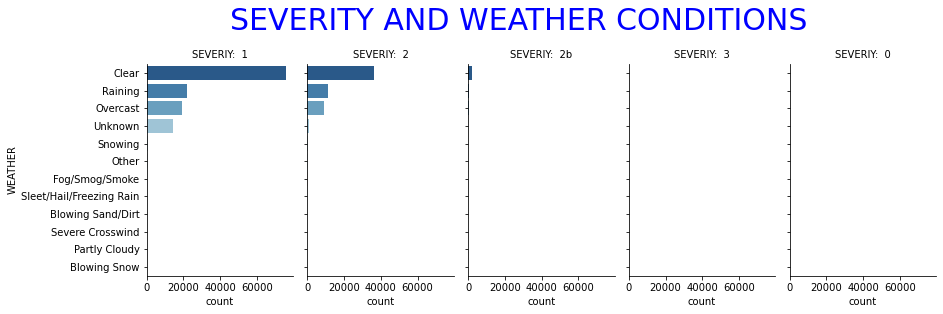

In [6]:
df = car_acc_df[["WEATHER", "SEVERITYCODE"]]
df = df.groupby(["WEATHER", "SEVERITYCODE"]).size().reset_index(name='count').sort_values(['count'], ascending= False)
plot = sns.catplot("count", "WEATHER", col="SEVERITYCODE", data=df, kind="bar",orient ="h",palette = "RdBu_r",
                  height=4.4, aspect=0.6)
plt.subplots_adjust(top=0.8)
plot.fig.suptitle('          SEVERITY AND WEATHER CONDITIONS', fontsize=30,color ="blue")
plot.set_titles("SEVERIY:  {col_name}",fontsize = 20)

#### SPEEDING
<hr style="border:1px solid green"> </hr>

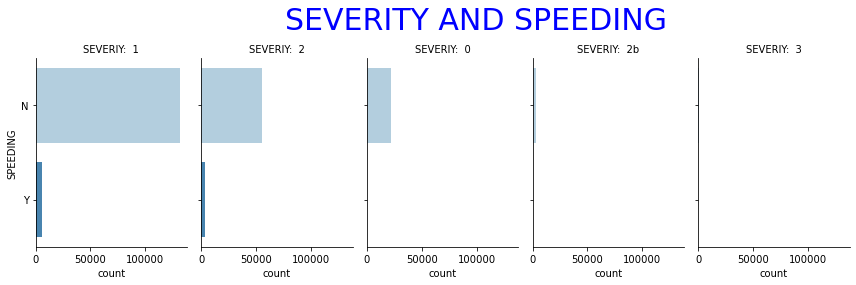

In [7]:
df = car_acc_df.loc[:,["SPEEDING", "SEVERITYCODE"]]
df['SPEEDING'] = df['SPEEDING'].fillna('N')
df = df.groupby(["SPEEDING", "SEVERITYCODE"]).size().reset_index(name='count').sort_values(['count'], ascending= False)
plot = sns.catplot("count", "SPEEDING", col="SEVERITYCODE", data=df, kind="bar",orient ="h",palette = "Blues",
                  height=4, aspect=0.6)
plt.subplots_adjust(top=0.8)
plot.fig.suptitle('          SEVERITY AND SPEEDING', fontsize=30,color ="blue")
plot.set_titles("SEVERIY:  {col_name}",fontsize = 20)

#### LIGHTCOND
<hr style="border:1px solid green"> </hr>

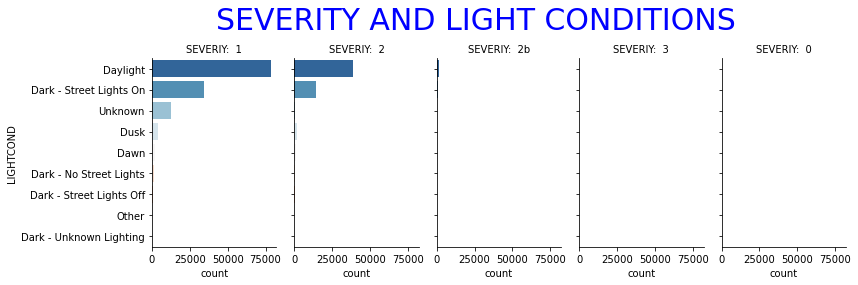

In [8]:
df = car_acc_df.loc[:,["LIGHTCOND", "SEVERITYCODE"]]
df = df.groupby(["LIGHTCOND", "SEVERITYCODE"]).size().reset_index(name='count').sort_values(['count'], ascending= False)
plot = sns.catplot("count", "LIGHTCOND", col="SEVERITYCODE", data=df, kind="bar",orient ="h",palette = "RdBu_r",
                  height=4, aspect=0.6)
plt.subplots_adjust(top=0.8)
plot.fig.suptitle('          SEVERITY AND LIGHT CONDITIONS', fontsize=30,color ="blue")
plot.set_titles("SEVERIY:  {col_name}",fontsize = 20)

#### ROADCOND
<hr style="border:1px solid green"> </hr>

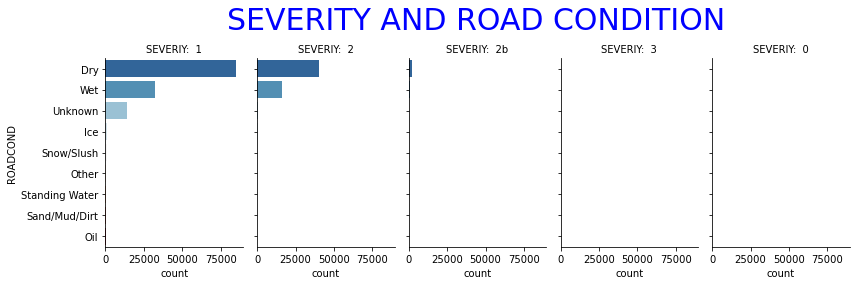

In [9]:
df = car_acc_df.loc[:,["ROADCOND", "SEVERITYCODE"]]
df = df.groupby(["ROADCOND", "SEVERITYCODE"]).size().reset_index(name='count').sort_values(['count'], ascending= False)
plot = sns.catplot("count", "ROADCOND", col="SEVERITYCODE", data=df, kind="bar",orient ="h",palette = "RdBu_r",
                  height=4, aspect=0.6)
plt.subplots_adjust(top=0.8)
plot.fig.suptitle('          SEVERITY AND ROAD CONDITION', fontsize=30,color ="blue")
plot.set_titles("SEVERIY:  {col_name}",fontsize = 20)

### JUNCTIONTYPE
<hr style="border:1px solid green"> </hr>

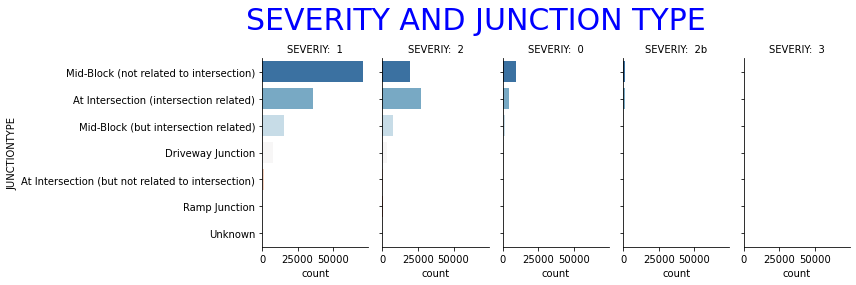

In [10]:
df = car_acc_df.loc[:,["JUNCTIONTYPE", "SEVERITYCODE"]]
df = df.groupby(["JUNCTIONTYPE", "SEVERITYCODE"]).size().reset_index(name='count').sort_values(['count'], ascending= False)
plot = sns.catplot("count", "JUNCTIONTYPE", col="SEVERITYCODE", data=df, kind="bar",orient ="h",palette = "RdBu_r",
                  height=4, aspect=0.6)
plt.subplots_adjust(top=0.8)
plot.fig.suptitle('          SEVERITY AND JUNCTION TYPE', fontsize=30,color ="blue")
plot.set_titles("SEVERIY:  {col_name}",fontsize = 20)

# 3. Data Preparation<a name="data_pr"></a>
<hr style="border:1px solid black"> </hr>
In this section the dataset is prepared, only the data that is needed is taken, cleaned, balanced, standardized and divided into training and testing arrays.

## 3.1 Import Packages <a name="imp_pack_data_pre"></a>
import necesary packages for data preparation

In [11]:
try:
    import numpy as np
    from sklearn import preprocessing
    from sklearn.utils import resample
    from sklearn.model_selection import train_test_split
    print("All Packages Installed")
except:
    pass

All Packages Installed


## 3.2 Data Separation <a name="data_se"></a>
variables and target are taken to a new Dataset

In [12]:
car_acc = car_acc_df[["WEATHER","SPEEDING","LIGHTCOND","ROADCOND","JUNCTIONTYPE","PERSONCOUNT","VEHCOUNT","SEVERITYCODE"]]
car_acc.head()

,WEATHER,SPEEDING,LIGHTCOND,ROADCOND,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT,SEVERITYCODE
0,NaN,NaN,NaN,NaN,Mid-Block (not related to intersection),0,0,0
1,NaN,NaN,NaN,NaN,NaN,0,0,0
2,Overcast,NaN,Daylight,Dry,Mid-Block (not related to intersection),2,2,1
3,Clear,NaN,Other,Dry,Mid-Block (not related to intersection),2,2,1
4,Clear,NaN,Daylight,Dry,Mid-Block (but intersection related),2,2,1


## 3.3 Data Cleaning <a name="data_cl"></a>
data is cleaned variable by variable

#### WEATHER
<hr style="border:1px solid green"> </hr>

In [13]:
car_acc.WEATHER.value_counts(dropna=False)

Clear                       114342
Raining                      34019
Overcast                     28504
NaN                          26593
Unknown                      15131
Snowing                        919
Other                          851
Fog/Smog/Smoke                 577
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               56
Severe Crosswind                26
Partly Cloudy                    9
Blowing Snow                     1
Name: WEATHER, dtype: int64

lets take the following actions:
* Replace NaN values with the mode
* Replace 'Unknown' values with the mode
* Drop 'Other' values

In [14]:
pd.set_option('mode.chained_assignment', None)
car_acc['WEATHER'].fillna(car_acc['WEATHER'].mode()[0], inplace=True)
car_acc['WEATHER'] = car_acc['WEATHER'].replace(['Unknown'],car_acc['WEATHER'].mode()[0])
car_acc = car_acc[car_acc.WEATHER !="Other"]

In [15]:
car_acc.WEATHER.value_counts(dropna=False)

Clear                       156066
Raining                      34019
Overcast                     28504
Snowing                        919
Fog/Smog/Smoke                 577
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               56
Severe Crosswind                26
Partly Cloudy                    9
Blowing Snow                     1
Name: WEATHER, dtype: int64

#### SPEEDING
<hr style="border:1px solid green"> </hr>

In [16]:
car_acc.SPEEDING.value_counts(dropna=False)

NaN    210406
Y        9887
Name: SPEEDING, dtype: int64

In the metadata of the database we can se that this value would take 2 values 'Y' or 'N', so lets change NaN values to 'N'

In [17]:
car_acc['SPEEDING'] = car_acc['SPEEDING'].fillna('N')

In [18]:
car_acc.SPEEDING.value_counts(dropna=False)

N    210406
Y      9887
Name: SPEEDING, dtype: int64

#### LIGHTCOND
<hr style="border:1px solid green"> </hr>

In [19]:
car_acc.LIGHTCOND.value_counts(dropna=False)

Daylight                    118840
Dark - Street Lights On      49904
NaN                          26675
Unknown                      13199
Dusk                          6051
Dawn                          2590
Dark - No Street Lights       1564
Dark - Street Lights Off      1230
Other                          224
Dark - Unknown Lighting         16
Name: LIGHTCOND, dtype: int64

lets take the following actions:
* Replace NaN values with the mode
* Replace 'Unknown' values with the mode
* Drop 'Other' values
* Combine 'Dark - No Street Lights' and 'Dark - Street Lights Off' into a new category 'Dark - No Street Lights / Street Lights Off'
* Replace 'Dark - Unknown Lighting' to the mode of dark values 'Dark - Street Lights On'

In [20]:
car_acc['LIGHTCOND'].fillna(car_acc['LIGHTCOND'].mode()[0], inplace=True)
car_acc['LIGHTCOND'] = car_acc['LIGHTCOND'].replace(['Unknown'],car_acc['LIGHTCOND'].mode()[0])
car_acc = car_acc[car_acc.LIGHTCOND !="Other"]
car_acc['LIGHTCOND'] = car_acc['LIGHTCOND'].replace(['Dark - No Street Lights'],'Dark - No Street Lights / Street Lights Off')
car_acc['LIGHTCOND'] = car_acc['LIGHTCOND'].replace(['Dark - Street Lights Off'],'Dark - No Street Lights / Street Lights Off')

In [21]:
car_acc.LIGHTCOND.value_counts(dropna=False)

Daylight                                       158714
Dark - Street Lights On                         49904
Dusk                                             6051
Dark - No Street Lights / Street Lights Off      2794
Dawn                                             2590
Dark - Unknown Lighting                            16
Name: LIGHTCOND, dtype: int64

#### ROADCOND
<hr style="border:1px solid green"> </hr>

In [22]:
car_acc.ROADCOND.value_counts(dropna=False)

Dry               127857
Wet                48547
NaN                26511
Unknown            14565
Ice                 1211
Snow/Slush          1000
Other                123
Standing Water       116
Sand/Mud/Dirt         76
Oil                   63
Name: ROADCOND, dtype: int64

lets take the following actions:
* Replace NaN values with the mode
* Replace 'Unknown' values with the mode

In [23]:
car_acc['ROADCOND'].fillna(car_acc['ROADCOND'].mode()[0], inplace=True)
car_acc['ROADCOND'] = car_acc['ROADCOND'].replace(['Unknown'],car_acc['ROADCOND'].mode()[0])

In [24]:
car_acc.ROADCOND.value_counts(dropna=False)

Dry               168933
Wet                48547
Ice                 1211
Snow/Slush          1000
Other                123
Standing Water       116
Sand/Mud/Dirt         76
Oil                   63
Name: ROADCOND, dtype: int64

#### JUNCTIONTYPE
<hr style="border:1px solid green"> </hr>

In [25]:
car_acc.JUNCTIONTYPE.value_counts(dropna=False)

Mid-Block (not related to intersection)              100851
At Intersection (intersection related)                68901
Mid-Block (but intersection related)                  24313
NaN                                                   11864
Driveway Junction                                     11445
At Intersection (but not related to intersection)      2486
Ramp Junction                                           188
Unknown                                                  21
Name: JUNCTIONTYPE, dtype: int64

lets take the following actions:
* Replace NaN values with the mode
* Drop 'Unknown' values

In [26]:
car_acc['JUNCTIONTYPE'].fillna(car_acc['JUNCTIONTYPE'].mode()[0], inplace=True)
car_acc = car_acc[car_acc.JUNCTIONTYPE !="Unknown"]

In [27]:
car_acc.JUNCTIONTYPE.value_counts(dropna=False)

Mid-Block (not related to intersection)              112715
At Intersection (intersection related)                68901
Mid-Block (but intersection related)                  24313
Driveway Junction                                     11445
At Intersection (but not related to intersection)      2486
Ramp Junction                                           188
Name: JUNCTIONTYPE, dtype: int64

#### PERSONCOUNT
<hr style="border:1px solid green"> </hr>

Check if there are missing values in this column

In [28]:
print("NaN Values in this column :",car_acc.PERSONCOUNT.isnull().values.any())

NaN Values in this column : False


#### VEHCOUNT
<hr style="border:1px solid green"> </hr>

Check if there are missing values in this column

In [29]:
print("NaN Values in this column :",car_acc.VEHCOUNT.isnull().values.any())

NaN Values in this column : False


#### SEVERITYCODE
<hr style="border:1px solid green"> </hr>

In [30]:
car_acc.SEVERITYCODE.value_counts(dropna=False)

1      136516
2       58492
0       21607
2b       3086
3         346
NaN         1
Name: SEVERITYCODE, dtype: int64

lets take the following actions:
* Replace NaN values with the mode
* Replace '3' value to '4' and Replace '2b' value to '3'

In [31]:
car_acc['SEVERITYCODE'].fillna(car_acc['SEVERITYCODE'].mode()[0], inplace=True)
car_acc['SEVERITYCODE'] = car_acc['SEVERITYCODE'].replace(['3'],'4')
car_acc['SEVERITYCODE'] = car_acc['SEVERITYCODE'].replace(['2b'],'3')

In [32]:
car_acc.SEVERITYCODE.value_counts(dropna=False)

1    136517
2     58492
0     21607
3      3086
4       346
Name: SEVERITYCODE, dtype: int64

## 3.4 Categorize Data <a name="cat_data"></a>
### category variables
some variables need to ve comverted to categorical and to do that its necesary to have the data in numpy format

In [33]:
x = car_acc[["WEATHER","SPEEDING","LIGHTCOND","ROADCOND","JUNCTIONTYPE","PERSONCOUNT","VEHCOUNT"]].values
y = car_acc[["SEVERITYCODE"]].values
x[0:5]

array([['Clear', 'N', 'Daylight', 'Dry',
        'Mid-Block (not related to intersection)', 0, 0],
       ['Clear', 'N', 'Daylight', 'Dry',
        'Mid-Block (not related to intersection)', 0, 0],
       ['Overcast', 'N', 'Daylight', 'Dry',
        'Mid-Block (not related to intersection)', 2, 2],
       ['Clear', 'N', 'Daylight', 'Dry',
        'Mid-Block (but intersection related)', 2, 2],
       ['Clear', 'N', 'Daylight', 'Dry',
        'At Intersection (intersection related)', 4, 2]], dtype=object)

categorize variables using sklearn.preprocessing.LabelEncoder() and almacening the mapping in dictionaries

In [34]:
le_weather = preprocessing.LabelEncoder()
le_weather.fit(list(car_acc["WEATHER"].unique()))
le_weather_mapping = dict(zip(le_weather.classes_, le_weather.transform(le_weather.classes_)))
x[:,0] = le_weather.transform(x[:,0]) 

le_speeding = preprocessing.LabelEncoder()
le_speeding.fit(list(car_acc["SPEEDING"].unique()))
le_speeding_mapping = dict(zip(le_speeding.classes_, le_speeding.transform(le_speeding.classes_)))
x[:,1] = le_speeding.transform(x[:,1]) 

le_lightcond = preprocessing.LabelEncoder()
le_lightcond.fit(list(car_acc["LIGHTCOND"].unique()))
le_lightcond_mapping = dict(zip(le_lightcond.classes_, le_lightcond.transform(le_lightcond.classes_)))
x[:,2] = le_lightcond.transform(x[:,2])

le_roadcond = preprocessing.LabelEncoder()
le_roadcond.fit(list(car_acc["ROADCOND"].unique()))
le_roadcond_mapping = dict(zip(le_roadcond.classes_, le_roadcond.transform(le_roadcond.classes_)))
x[:,3] = le_roadcond.transform(x[:,3])

le_junctiontype = preprocessing.LabelEncoder()
le_junctiontype.fit(list(car_acc["JUNCTIONTYPE"].unique()))
le_junctiontype_mapping = dict(zip(le_junctiontype.classes_, le_junctiontype.transform(le_junctiontype.classes_)))
x[:,4] = le_junctiontype.transform(x[:,4])

Now lets see how the data has been transform

In [35]:
x[0:5]

array([[2, 0, 4, 0, 4, 0, 0],
       [2, 0, 4, 0, 4, 0, 0],
       [4, 0, 4, 0, 4, 2, 2],
       [2, 0, 4, 0, 3, 2, 2],
       [2, 0, 4, 0, 1, 4, 2]], dtype=object)

now lets look the data in dataframe format

In [36]:
car_acc = pd.DataFrame(x)
car_acc.columns = ["WEATHER","SPEEDING","LIGHTCOND","ROADCOND","JUNCTIONTYPE","PERSONCOUNT","VEHCOUNT"]
car_acc['SEVERITYCODE'] = y
car_acc.head()

,WEATHER,SPEEDING,LIGHTCOND,ROADCOND,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT,SEVERITYCODE
0,2,0,4,0,4,0,0,0
1,2,0,4,0,4,0,0,0
2,4,0,4,0,4,2,2,1
3,2,0,4,0,3,2,2,1
4,2,0,4,0,1,4,2,2


### Continuos Variables

In [37]:
car_acc['PERSONCOUNT_CAT'] = pd.qcut(car_acc['PERSONCOUNT'], q=4, duplicates='drop')
car_acc['VEHCOUNT_CAT'] = pd.qcut(car_acc['PERSONCOUNT'], q=4, duplicates='drop')
car_acc.head()

,WEATHER,SPEEDING,LIGHTCOND,ROADCOND,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT,SEVERITYCODE,PERSONCOUNT_CAT,VEHCOUNT_CAT
0,2,0,4,0,4,0,0,0,"(-0.001, 2.0]","(-0.001, 2.0]"
1,2,0,4,0,4,0,0,0,"(-0.001, 2.0]","(-0.001, 2.0]"
2,4,0,4,0,4,2,2,1,"(-0.001, 2.0]","(-0.001, 2.0]"
3,2,0,4,0,3,2,2,1,"(-0.001, 2.0]","(-0.001, 2.0]"
4,2,0,4,0,1,4,2,2,"(3.0, 93.0]","(3.0, 93.0]"


In [38]:
x = car_acc[["WEATHER","SPEEDING","LIGHTCOND","ROADCOND","JUNCTIONTYPE","PERSONCOUNT","VEHCOUNT","SEVERITYCODE",
            "PERSONCOUNT_CAT","VEHCOUNT_CAT"]].values

le_person = preprocessing.LabelEncoder()
le_person.fit(list(car_acc["PERSONCOUNT_CAT"].unique()))
le_person_mapping = dict(zip(le_person.classes_, le_person.transform(le_person.classes_)))
x[:,8] = le_person.transform(x[:,8]) 

le_veh = preprocessing.LabelEncoder()
le_veh.fit(list(car_acc["VEHCOUNT_CAT"].unique()))
le_veh_mapping = dict(zip(le_veh.classes_, le_veh.transform(le_veh.classes_)))
x[:,9] = le_veh.transform(x[:,9]) 

x[0:5]

array([[2, 0, 4, 0, 4, 0, 0, '0', 0, 0],
       [2, 0, 4, 0, 4, 0, 0, '0', 0, 0],
       [4, 0, 4, 0, 4, 2, 2, '1', 0, 0],
       [2, 0, 4, 0, 3, 2, 2, '1', 0, 0],
       [2, 0, 4, 0, 1, 4, 2, '2', 2, 2]], dtype=object)

In [39]:
car_acc = pd.DataFrame(x)
car_acc.columns = ["WEATHER","SPEEDING","LIGHTCOND","ROADCOND","JUNCTIONTYPE","PERSONCOUNT","VEHCOUNT","SEVERITYCODE",
                   "PERSONCOUNT_CAT","VEHCOUNT_CAT"]
car_acc.drop(['PERSONCOUNT','VEHCOUNT'], axis=1, inplace=True)
car_acc.rename(columns={'PERSONCOUNT_CAT': 'PERSONCOUNT', 'VEHCOUNT_CAT': 'VEHCOUNT'}, inplace=True)
car_acc.head()

,WEATHER,SPEEDING,LIGHTCOND,ROADCOND,JUNCTIONTYPE,SEVERITYCODE,PERSONCOUNT,VEHCOUNT
0,2,0,4,0,4,0,0,0
1,2,0,4,0,4,0,0,0
2,4,0,4,0,4,1,0,0
3,2,0,4,0,3,1,0,0
4,2,0,4,0,1,2,2,2


### Code Mapping

|  WEATHER | CODE | ---- | SPEEDING | CODE | ---- | LIGHTCOND | CODE |
| :- | | | | | | |-: |
| Blowing Sand/Dirt| 0 | ---- | N | 0 | ---- | Dark - No Street Lights / Street Lights Off | 0 |
| Blowing Snow | 1 | ---- | Y | 1 | ---- | Dark - Street Lights On | 1 |
| Clear | 2 | ---- | | | ---- | Dark - Unknown Lighting | 2 |
| Fog/Smog/Smoke | 3 | ---- | | | ---- | Dawn | 3 |
| Overcast | 4 | ---- | | | ---- | Daylight | 4 |
| Partly Cloudy | 5 | ---- | | | ---- | Dusk | 5 |
| Raining | 6 | ---- | | | ---- | | |
| Severe Crosswind | 7 | ---- | | | ---- | | |
| Sleet/Hail/Freezing Rain | 8 | ---- | | | ---- | | |
| Snowing | 9 | ---- | | | ---- | | |

|  ROADCOND | CODE | --- | JUNCTIONTYPE | CODE | --- | PERSONCOUNT | CODE | --- | VEHCOUNT | CODE |
| :- | | | | | | | | | | -: |
| Dry | 0 | --- | At Intersection (but not related to intersection) | 0 | --- | 0 <= x < 2 | 0 | --- | 0 <= x < 2 | 0 |
| Ice | 1 | --- | At Intersection (intersection related) | 1 | --- | 2 <= x < 3 | 1 | --- | 2 <= x < 3 | 1 |
| Oil | 2 | --- | Driveway Junction | 2 | --- | 3 <= x < 93 | 2 | --- | 3 <= x < 93 | 2 |
| Other | 3 | --- | Mid-Block (but intersection related) | 3 | --- | | | | | |
| Sand/Mud/Dirt | 4 | --- | Mid-Block (not related to intersection) | 4 | --- | | | | | |
| Snow/Slush | 5 | --- | Ramp Junction | 5 | --- | | | | | |
| Standing Water | 6 | --- | | | --- | | | | | |
| Wet | 7 | --- | | | --- | | | | | |

## 3.5 Balance Data <a name="bal_data"></a>
now that the data is filtered and categorized proceed to balance the data with the Up-sample Minority Class method and Down-sample Mayority Class method

In [40]:
car_acc_0 = car_acc[car_acc.SEVERITYCODE == '0']
car_acc_1 = car_acc[car_acc.SEVERITYCODE == '1']
car_acc_2 = car_acc[car_acc.SEVERITYCODE == '2']
car_acc_3 = car_acc[car_acc.SEVERITYCODE == '3']
car_acc_4 = car_acc[car_acc.SEVERITYCODE == '4']
print("SHAPE 0: ",car_acc_0.shape)
print("SHAPE 1: ",car_acc_1.shape)
print("SHAPE 2: ",car_acc_2.shape)
print("SHAPE 3: ",car_acc_3.shape)
print("SHAPE 4: ",car_acc_4.shape)

SHAPE 0:  (21607, 8)
SHAPE 1:  (136517, 8)
SHAPE 2:  (58492, 8)
SHAPE 3:  (3086, 8)
SHAPE 4:  (346, 8)


Balance de data in a mid point in category 0

In [41]:
maj_class =car_acc_0.shape[0]

car_acc_1_upsampled = resample(car_acc_1,replace=True,n_samples=maj_class,random_state=123) 

car_acc_2_upsampled = resample(car_acc_2,replace=True,n_samples=maj_class,random_state=123) 

car_acc_3_upsampled = resample(car_acc_3,replace=True,n_samples=maj_class,random_state=123) 

car_acc_4_upsampled = resample(car_acc_4,replace=True,n_samples=maj_class,random_state=123) 

car_acc_upsampled = pd.concat([car_acc_1_upsampled, car_acc_0, car_acc_2_upsampled, car_acc_3_upsampled, car_acc_4_upsampled])

print("The shape of the upsample dataframe is : ",car_acc_upsampled.shape)

The shape of the upsample dataframe is :  (108035, 8)


In [42]:
car_acc_upsampled.reset_index(inplace = True,drop=True) 
car_acc_upsampled.head()

,WEATHER,SPEEDING,LIGHTCOND,ROADCOND,JUNCTIONTYPE,SEVERITYCODE,PERSONCOUNT,VEHCOUNT
0,4,0,4,7,4,1,0,0
1,6,0,4,7,4,1,0,0
2,2,0,4,0,2,1,1,1
3,6,0,4,7,1,1,0,0
4,2,0,4,0,4,1,1,1


## 3.6 Train / Test Division <a name="tt_div"></a>

divide the dataset into train and test with a proportion of 70/30

In [43]:
X = car_acc_upsampled[["WEATHER","SPEEDING","LIGHTCOND","ROADCOND","JUNCTIONTYPE","PERSONCOUNT","VEHCOUNT"]].values
Y = car_acc_upsampled["SEVERITYCODE"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

# 4. Modeling and Evaluation<a name="modeling"></a>
<hr style="border:1px solid black"> </hr>
start running diferent models

## 4.1 Import Packages <a name="imp_pack_mod"></a>
import necesary packages for Modeling

In [44]:
try:
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn import metrics
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import tree
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import classification_report, confusion_matrix
    import itertools
    from sklearn import svm
    print("All Packages Installed")
except:
    print("Error Installing Packages")

All Packages Installed


In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


## 4.2 K nearest neighbor (KNN)<a name="knn"></a>

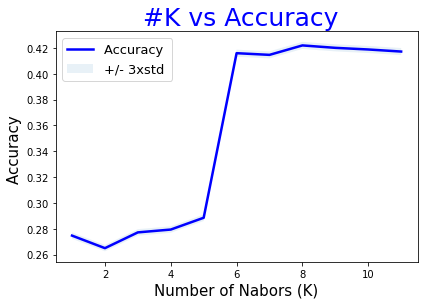

The best accuracy was with 0.42192465520965106 with k= 8


In [46]:
Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat_knn=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_knn)
    std_acc[n-1]=np.std(yhat_knn==y_test)/np.sqrt(yhat_knn.shape[0])
    
plt.plot(range(1,Ks),mean_acc,'blue',linewidth=2.5)
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'),fontsize =13)
plt.ylabel('Accuracy ',fontsize =15)
plt.xlabel('Number of Nabors (K)',fontsize =15)
plt.tight_layout()
plt.title(label=" #K vs Accuracy", fontsize=25, color="blue") 
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

Lest take K= 8 to do the model

In [47]:
k = 8
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
yhat_knn = neigh.predict(x_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

Train set Accuracy:  0.4291230297260129
Test set Accuracy:  0.42192465520965106


Confusion matrix, without normalization
[[2736  537  911  919 1325]
 [1028 1177 1339 1152 1762]
 [ 766  867 1736 1391 1694]
 [ 573  742 1237 1537 2491]
 [   0    2    0    0 6489]]


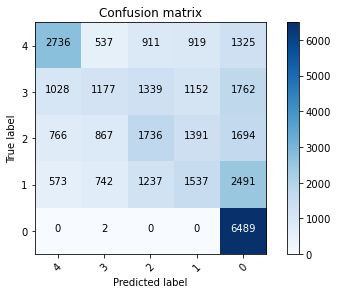

In [48]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_knn, labels=["4","3","2","1","0"])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["4","3","2","1","0"],normalize= False,  title='Confusion matrix')

## 4.3 Decision Tree<a name="dec_tree"></a>

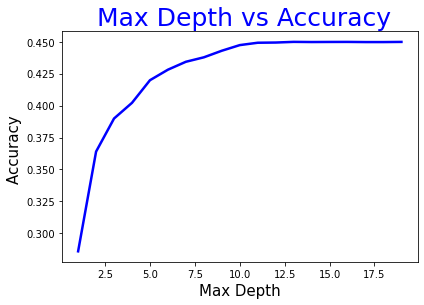

In [49]:
depth = 20
acc = []
for d in range(1,depth):
    dectree = DecisionTreeClassifier(criterion="entropy", max_depth = d)
    dectree.fit(x_train,y_train)
    predtree = dectree.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, predtree))
plt.plot(range(1,depth),acc,'blue',linewidth=2.5)
plt.ylabel('Accuracy ',fontsize =15)
plt.xlabel('Max Depth',fontsize =15)
plt.tight_layout()
plt.title(label=" Max Depth vs Accuracy", fontsize=25, color="blue") 
plt.show()

Take max depth as 12

In [50]:
dectree = DecisionTreeClassifier(criterion="entropy", max_depth = 12)
dectree.fit(x_train,y_train)
predtree = dectree.predict(x_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predtree))

DecisionTrees's Accuracy:  0.4493844682360927


### Visualization

In [51]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

#### Text Representation

In [52]:
text_representation = tree.export_text(dectree)
print(text_representation)

|--- feature_5 <= 0.50
|   |--- feature_2 <= 3.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_4 <= 1.50
|   |   |   |   |--- feature_0 <= 4.50
|   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |--- feature_2 <= 2.00
|   |   |   |   |   |   |   |--- feature_0 <= 3.00
|   |   |   |   |   |   |   |   |--- feature_3 <= 3.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_3 >  3.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  3.00
|   |   |   |   |   |   |   |   |--- feature_3 <= 3.50
|   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |--- feature_3 >  3.50
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_2 >  2.00
|   |   | 

Decision Tree

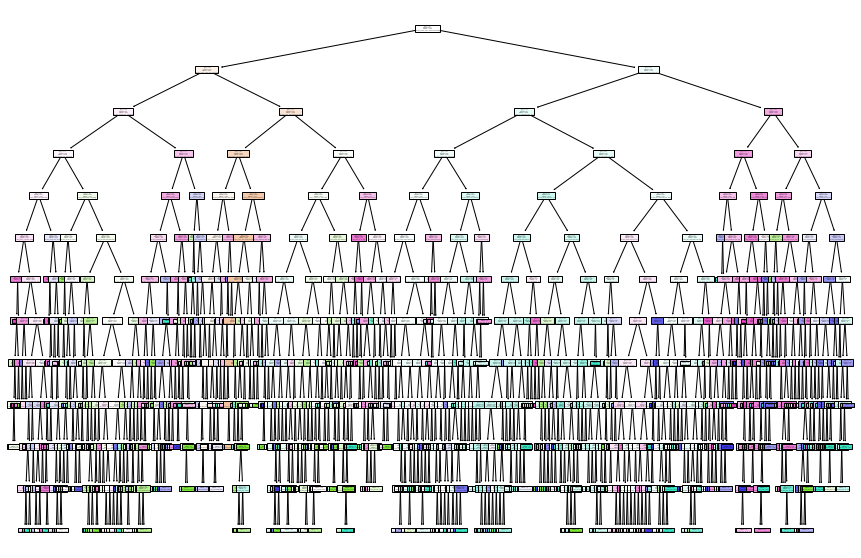

In [53]:
fig, ax = plt.subplots(figsize=(15, 10))  # whatever size you want
tree.plot_tree(dectree, ax=ax, filled = True)
fig.savefig('dectree.png')
plt.show()

Confusion matrix, without normalization
[[3671  225 1019  188 1325]
 [1552 1042 1691  411 1762]
 [1046  655 2473  586 1694]
 [1199  456 1546  890 2489]
 [   0    0    2    0 6489]]


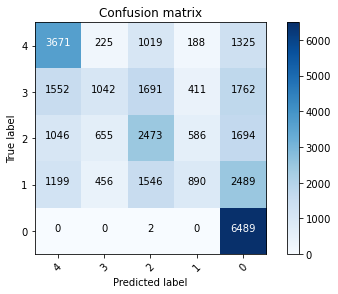

In [54]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predtree, labels=["4","3","2","1","0"])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["4","3","2","1","0"],normalize= False,  title='Confusion matrix')

## 4.4 Logistic Regression <a name="log_reg"></a>

In [55]:
lr = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
yhat_lr = lr.predict(x_test)
yhat_prob_lr = lr.predict_proba(x_test)
metrics.accuracy_score(y_test, yhat_lr)

0.40733084446638484

Confusion matrix, without normalization
[[2544  203 1281 1017 1383]
 [1499  342 1719 1029 1869]
 [1028  259 2362 1055 1750]
 [ 912  171 1335 1573 2589]
 [   0  108    0    2 6381]]


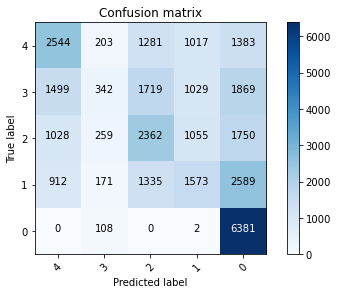

In [56]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_lr, labels=["4","3","2","1","0"])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["4","3","2","1","0"],normalize= False,  title='Confusion matrix')

## 4.5 Support Vector Machine (SVM) <a name="svm"></a>

In [57]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 

SVC()

In [58]:
yhat_svm = clf.predict(x_test)

In [59]:
metrics.accuracy_score(y_test, yhat_svm)

0.42534941840733087

Confusion matrix, without normalization
[[2541  335 1318  892 1342]
 [1228  545 2032  845 1808]
 [ 724  428 2756  822 1724]
 [ 593  301 1707 1455 2524]
 [   0    0    2    0 6489]]


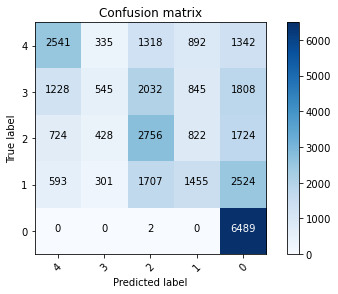

In [60]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_svm, labels=["4","3","2","1","0"])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["4","3","2","1","0"],normalize= False,  title='Confusion matrix')

## 4.6 Evaluation <a name="eval"></a>

#### Score

In [61]:
knn_score = metrics.accuracy_score(y_test, yhat_knn)
dectree_score = metrics.accuracy_score(y_test, predtree)
logreg_score = metrics.accuracy_score(y_test, yhat_lr)
svm_score = metrics.accuracy_score(y_test, yhat_svm)

#### F1 Score

In [62]:
knn_f1 = f1_score(y_test, yhat_knn, average='weighted')
dectree_f1 = f1_score(y_test, predtree, average='weighted')
logreg_f1 = f1_score(y_test, yhat_lr, average='weighted')
svm_f1 = f1_score(y_test, yhat_svm, average='weighted')

#### Table

In [63]:
acc_df =pd.DataFrame(columns = ["Score","F1 Score"],index =["KNN","Decision Tree","Logistic Regression","SVM"])
acc_df.loc["KNN","Score"] =knn_score.round(3)
acc_df.loc["KNN","F1 Score"] =knn_f1.round(3)
acc_df.loc["Decision Tree","Score"] =dectree_score.round(3)
acc_df.loc["Decision Tree","F1 Score"] =dectree_f1.round(3)
acc_df.loc["Logistic Regression","Score"] =logreg_score.round(3)
acc_df.loc["Logistic Regression","F1 Score"] =logreg_f1.round(3)
acc_df.loc["SVM","Score"] = svm_score.round(3)
acc_df.loc["SVM","F1 Score"] = svm_f1.round(3)
acc_df

,Score,F1 Score
KNN,0.422,0.384
Decision Tree,0.449,0.397
Logistic Regression,0.407,0.353
SVM,0.425,0.375


# 5. Conclusion<a name="conc"></a>
<hr style="border:1px solid black"> </hr>

Purpose of this project was to predict  the severity of a car collission based on the current weather, road and visibility conditions through the development of an algorithm in which all the principles of data science were developed.

Using different prediction models it was obtained that the most suitable model is the decision tree with an accuracy of 45%, 
this is not a desired value as it is too low to consider that the prediction model is correct.

work should continue on the model to improve its accuracy by prior manipulation of the data, rethinking the variables that are considered important.